In [17]:
import pandas as pd
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)

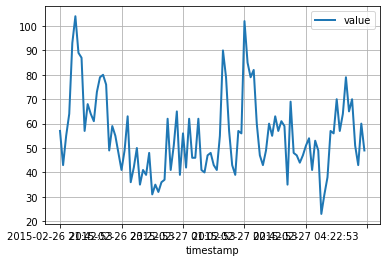

In [18]:
import matplotlib.pyplot as plt
df[:100].plot(linewidth=2)
plt.grid(which='both')
plt.show()

In [19]:
df

,value
timestamp,
2015-02-26 21:42:53,57
2015-02-26 21:47:53,43
2015-02-26 21:52:53,55
2015-02-26 21:57:53,64
2015-02-26 22:02:53,93
...,...
2015-04-22 20:32:53,51
2015-04-22 20:37:53,54
2015-04-22 20:42:53,46


In [14]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"]}],
    freq = "5min"
)

In [15]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

estimator = DeepAREstimator(freq="5min", prediction_length=12, trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=training_data)

100%|██████████| 50/50 [00:02<00:00, 21.90it/s, epoch=10/10, avg_epoch_loss=3.95]


learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


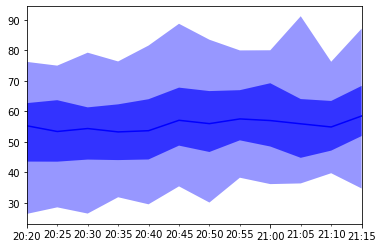

In [16]:
test_data = ListDataset(
    [{'start': df.index[0], 'target': df.value[-2000:]}],
    freq='5min'
)

next(predictor.predict(test_data))
next(predictor.predict(test_data)).plot()
